**Lets Grow More**

**Data Science Intership(VIP)**

**Author:-EERAPURAM ASHISH KUMAR**

**Title :-Stock Market Prediction and Forecasting using Stacked LSTM**

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NSE.csv')

In [16]:
data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [17]:
data.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94


In [18]:
data['Date']=pd.to_datetime(data['Date'])
print(type(data.Date[0]))

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [19]:
df=data.sort_values(by='Date')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


In [20]:
df.reset_index(inplace=True)

In [21]:
df.head()

,index,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,1234,2013-10-08,157.00,157.80,155.20,155.8,155.80,1720413.0,2688.94
1,1233,2013-10-09,155.70,158.20,154.15,155.3,155.55,2049580.0,3204.49
2,1232,2013-10-10,156.00,160.80,155.85,160.3,160.15,3124853.0,4978.80
3,1231,2013-10-11,161.15,163.45,159.00,159.8,160.05,1880046.0,3030.76
4,1230,2013-10-14,160.85,161.45,157.70,159.3,159.45,1281419.0,2039.09


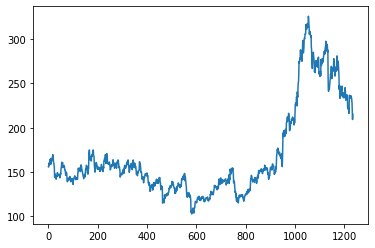

In [22]:
plt.plot(df['Close'])

In [23]:
df1=df['Close']

In [24]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [25]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.23823398],
       [0.2371134 ],
       [0.25773196],
       ...,
       [0.51792918],
       [0.47758853],
       [0.50425818]])

In [26]:
training_size=int(len(df1)*0.70)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [27]:
training_size,test_size

(864, 371)

In [28]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [29]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [30]:
print(X_train.shape), print(y_train.shape)

(763, 100)
(763,)


(None, None)

In [31]:
print(X_test.shape), print(ytest.shape)

(270, 100)
(270,)


(None, None)

In [32]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [34]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.fit(X_train,y_train,validation_split=0.1,epochs=60,batch_size=64,verbose=1)

Epoch 1/60
11/11 [==============================] - 10s 335ms/step - loss: 0.0068 - val_loss: 0.0023
Epoch 2/60
11/11 [==============================] - 2s 196ms/step - loss: 0.0022 - val_loss: 7.9165e-04
Epoch 3/60
11/11 [==============================] - 2s 195ms/step - loss: 0.0015 - val_loss: 5.7434e-04
Epoch 4/60
11/11 [==============================] - 2s 191ms/step - loss: 0.0012 - val_loss: 9.2050e-04
Epoch 5/60
11/11 [==============================] - 2s 189ms/step - loss: 0.0010 - val_loss: 0.0010
Epoch 6/60
11/11 [==============================] - 2s 189ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 7/60
11/11 [==============================] - 2s 193ms/step - loss: 0.0010 - val_loss: 9.3088e-04
Epoch 8/60
11/11 [==============================] - 2s 191ms/step - loss: 9.5104e-04 - val_loss: 7.0427e-04
Epoch 9/60
11/11 [==============================] - 2s 190ms/step - loss: 9.0192e-04 - val_loss: 4.7192e-04
Epoch 10/60
11/11 [==============================] - 2s 195ms/step 

In [36]:
test_predict=model.predict(X_test)

In [37]:
test_predict1=scaler.inverse_transform(test_predict)

In [38]:
test_predict1

array([[0.42412078],
       [0.42561138],
       [0.4386654 ],
       [0.45482892],
       [0.46874362],
       [0.47996068],
       [0.48993212],
       [0.49018037],
       [0.49092853],
       [0.49032575],
       [0.49262214],
       [0.49966782],
       [0.5037425 ],
       [0.50282043],
       [0.48552573],
       [0.4599443 ],
       [0.44946855],
       [0.4436013 ],
       [0.44721085],
       [0.45847672],
       [0.4712441 ],
       [0.47882754],
       [0.4869442 ],
       [0.49332845],
       [0.49483204],
       [0.4931901 ],
       [0.4915985 ],
       [0.4938593 ],
       [0.49506176],
       [0.4941429 ],
       [0.4933551 ],
       [0.48854393],
       [0.48035157],
       [0.47139704],
       [0.4736061 ],
       [0.47586977],
       [0.48271358],
       [0.50397336],
       [0.534635  ],
       [0.5597415 ],
       [0.57372594],
       [0.57489   ],
       [0.567529  ],
       [0.5714565 ],
       [0.5661924 ],
       [0.556653  ],
       [0.57122695],
       [0.587

In [39]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(ytest,test_predict))

0.0346721802923978